<a href="https://colab.research.google.com/github/JennyferSRodriguezH/Simulacion-I/blob/main/Metodo_Box_Muller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

De acuerdo con el articulo **A note on the generation of random normal deviates** la creacion de los números aleatorios puden ser generados por una variedad de métodos, el proposito es proporcionar un nuevo método para la creacion de los némeros o variables aleatorias independientes con una escala pequeña o grande.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd

Para nuestro primer paso se sugiere una aproximacion que pueda generar una par de numeros aleatorios en la misma distribucion normal. Siendo $U_1$ y $U_2$ variables aleatorias independientes que son dentro del mismo rectangulo que determina la funcion de densidad en el intervalo (0,1).

In [ ]:
def metodo(n):
  lista=[] #iniciamos una lista vacia
  for _ in range(n):
      U1 = np.random.rand()
      U2 = np.random.rand()

      R = np.sqrt(-2*np.log(U1))
      T = 2*np.pi*U2

      X = R*np.cos(T)
      Y = R*np.sin(T)

      lista.append(X)
      lista.append(Y)

  return lista

Entonces los numeros aleatorios son un par de variables independientes:


1.   $X = (-2 \log_e U_1)^\frac{1}{2} cos(2 π U_2)$
2.   $Y = (-2 \log_e U_1)^\frac{1}{2} sin(2 π U_2)$

Una forma de justificar esto, es aplicar el metodo de la inversa a nuestras variables $X$ y $Y$ que nos daria de resultado:


*   $U_1 = e \frac{-(X^{2} + Y^{2})}{2}$
*   $U_2 = -\frac{1}{2π} arctan\frac{Y}{X}$

Si seguimos la densidad conjunta de estas variables, podemos obtener una funcion que nos incluye la independencia de X y Y.

$f(X, Y) = \frac{1}{2\pi}e\frac{-(X + Y)}{2} = \frac{1}{\sqrt{2\pi}} e\frac{-X^2}{2} ⋅\frac{1}{\sqrt{2\pi}} e \frac{-Y^2}{2} = f(X) f(Y) $

El enfoque anterior toma en consideracion: la probabilidad de la densidad de $f(X) f(Y)$ que esta constantemente en circulos y esta uniformemente distribuido en $(0,2\pi)$. Si consideramos a $U$ con una densidad rectangular con dos grados de libertad en el intervalo (0,1), entonces la distribucion que U tiene con respecto a la Chi-cuadrada es de $-2log_{e}$ . Con este procedimiento de manera inversa, podemos llegar a las ecuaciones 1 y 2.

Con la distribucion con Chi-cuadrada ademas de aportarnos grados de libertad que nos ayuda a determinar la forma de la distribucion en una desviacion generada por el metodo anterior. Las desviaciones de F y la distribucion son obtenidas al calcuar de manera apropiada relacion de las desviaciones generadas.  

In [ ]:
resultado=metodo(1000)
print(resultado)

[np.float64(-0.3451999245110219), np.float64(0.7945365809060573), np.float64(-0.01344044130456716), np.float64(-0.6153123465297635), np.float64(0.024350241110873444), np.float64(0.09677193858499168), np.float64(0.3486170614232646), np.float64(-0.2534560505874052), np.float64(-1.618732158655341), np.float64(-0.5228461659812372), np.float64(-0.5383464454105539), np.float64(-0.7357360499625446), np.float64(0.289454329776636), np.float64(-0.7056724846348548), np.float64(-0.38897430110102427), np.float64(-1.094818994614211), np.float64(1.726888267054716), np.float64(-0.9411069695975484), np.float64(-0.9683124968686502), np.float64(-0.34690011511789626), np.float64(-0.6692312924731426), np.float64(-0.1854274518820678), np.float64(1.3754809626460616), np.float64(0.8927825903047736), np.float64(-0.794611478027886), np.float64(0.7073856778647319), np.float64(-0.21068088398404583), np.float64(0.0282039956644531), np.float64(-0.21232966454717245), np.float64(0.22314207290090662), np.float64(-0.50

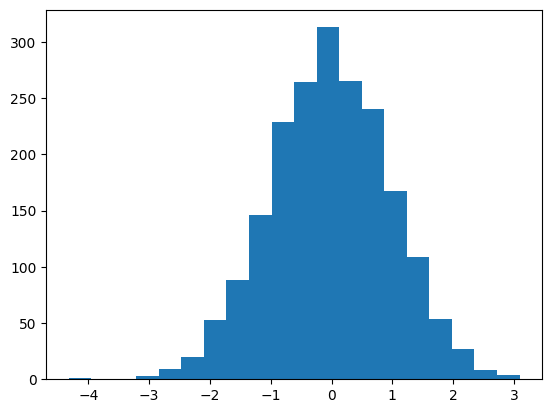

In [ ]:
plt.hist(resultado, bins = 20)
plt.show()

Este metodo sugiere una una forma confiable de generar una manera de general desviaciones que puedan ser confiables en las colas de la distribucion. Desde el uso de las librerias de los programas como la evaluacion de funciones trigonometricas, logaritmicas, aun cuando estos requieran una pequeña maquina adicional para ejecutarlas.